# Particle Swarm Optimization
Kelompok (DS-45-01):
- Ariq Heritsa Maalik (1305213031)
- Nadya Khairani (1305210069)
- Muhammad Baari Adli (1305213081)

Fungsi objektif:
$$p=\{c_1, c_2, \cdots, c_n\} \, c_i=(x_i,y_i)\in R^2$$
$$f(p)=\Sigma_{i=1}^{n-1} \sqrt{(x(c_i)-x(c_{i+1}))^2+(y(c_i)-y(c_{i+1}))^2}$$

# Import Package

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

from pso.util import Coordinate
from pso.pso import PSO

# Initialize City Coordinates

In [29]:
n = 20
cities = Coordinate.random_coordinate(20)

# Visualize Cities

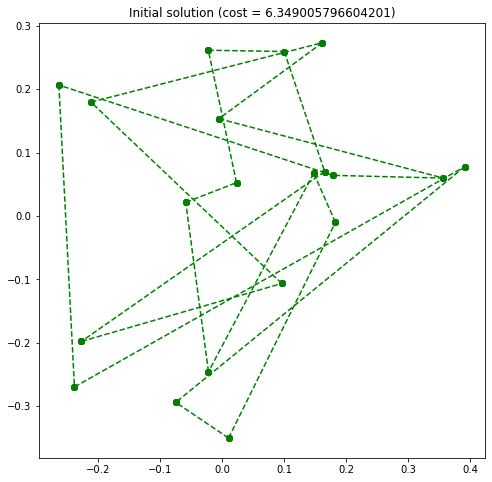

In [30]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

for a, b in zip(cities[:-1], cities[1:]):
    ax1.plot([a.x, b.x], [a.y, b.y], '--o', c='g')

ax1.plot([cities[0].x, cities[-1].x], [cities[0].y, cities[-1].y], '--o', c='g')

for city in cities:
    ax1.scatter(city.x, city.y, c='black')

plt.title('Initial solution (cost = ' + str(Coordinate.get_total_distance(cities)) + ')')

plt.show()

# Particle Swarm Optimization Algorithm

In [31]:
pso = PSO(iterations=1200, population_size=300, pbest_probability=0.9, gbest_probability=0.02, cities=cities)

In [32]:
pso.gbest = min(pso.particles, key=lambda p: p.pbest_cost)

for t in range(pso.iterations):
    pso.gbest = min(pso.particles, key=lambda p: p.pbest_cost)
    
    if t % 20 == 0:
        x_list, y_list = [], []
        for city in pso.gbest.pbest:
            x_list.append(city.x)
            y_list.append(city.y)
        x_list.append(pso.gbest.pbest[0].x)
        y_list.append(pso.gbest.pbest[0].y)
        
    pso.gcost_iter.append(pso.gbest.pbest_cost)

    for particle in pso.particles:
        particle.clear_velocity()
        temp_velocity = []
        gbest = pso.gbest.pbest[:]
        new_route = particle.route[:]

        for i in range(len(pso.cities)):
            if new_route[i] != particle.pbest[i]:
                swap = (i, particle.pbest.index(new_route[i]), pso.pbest_probability)
                temp_velocity.append(swap)
                new_route[swap[0]], new_route[swap[1]] = \
                    new_route[swap[1]], new_route[swap[0]]

        for i in range(len(pso.cities)):
            if new_route[i] != gbest[i]:
                swap = (i, gbest.index(new_route[i]), pso.gbest_probability)
                temp_velocity.append(swap)
                gbest[swap[0]], gbest[swap[1]] = gbest[swap[1]], gbest[swap[0]]

        particle.velocity = temp_velocity

        for swap in temp_velocity:
            if np.random.random() <= swap[2]:
                new_route[swap[0]], new_route[swap[1]] = \
                    new_route[swap[1]], new_route[swap[0]]

        particle.route = new_route
        particle.update_costs_and_pbest()

# Visualize Solution

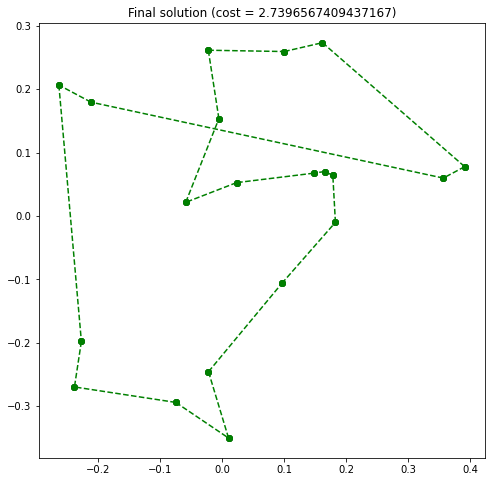

In [33]:
cities = pso.gbest.route

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

for a, b in zip(cities[:-1], cities[1:]):
    ax1.plot([a.x, b.x], [a.y, b.y], '--o', c='g')

ax1.plot([cities[0].x, cities[-1].x], [cities[0].y, cities[-1].y], '--o', c='g')

for city in cities:
    ax1.scatter(city.x, city.y, c='black')

plt.title('Final solution (cost = ' + str(Coordinate.get_total_distance(cities)) + ')')

plt.show()

# Evolution of Path

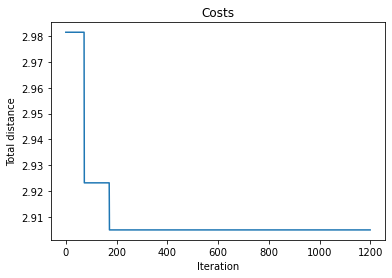

In [37]:
costs = pso.gcost_iter

plt.plot(costs)

plt.title('Costs')
plt.xlabel('Iteration')
plt.ylabel('Total distance')

plt.show()